In [40]:
import pandas as pd
import seaborn as sns
import numpy as np

#import matplotlib as mpl
#import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#from matplotlib.pyplot import figure
from matplotlib import pyplot as plt  # Import matplotlib.pyplot explicitly
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = (12, 8)  # Use plt.rcParams instead of matplotlib.rcParams

#%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\NEW USER\Documents\My Data Sources\Box Office Data.csv')     #dataframe loading method
df.head()

,Rank,Release Group,Total Revenue,Domestic Revenue,Domestic %,Foreign Revenue,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,"546,388,108","215,409,889",39,"330,978,219",61,2000,"Adventure, Action, Thriller",6.126/10,"6,741",en,United States of America
1,2,Gladiator,"460,583,960","187,705,427",41,"272,878,533",59,2000,"Action, Drama, Adventure",8.217/10,"19,032",en,"United Kingdom, United States of America"
2,3,Cast Away,"429,632,142","233,632,142",54,"196,000,000",46,2000,"Adventure, Drama",7.663/10,"11,403",en,United States of America
3,4,What Women Want,"374,111,707","182,811,707",49,"191,300,000",51,2000,"Comedy, Romance",6.45/10,"3,944",en,"United Kingdom, United States of America"
4,5,Dinosaur,"349,822,765","137,748,063",39,"212,074,702",61,2000,"Animation, Family, Adventure",6.544/10,"2,530",en,United States of America


In [7]:
#Find missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2f}%'.format(col, pct_missing * 100))

Rank - 0.00%
Release Group - 0.00%
Total Revenue - 0.00%
Domestic Revenue - 0.00%
Domestic % - 0.00%
Foreign Revenue - 0.00%
Foreign % - 0.00%
Year - 0.00%
Genres - 3.56%
Rating - 3.40%
Vote_Count - 3.40%
Original_Language - 3.40%
Production_Countries - 4.00%


In [8]:
# Convert "Rating" column to numeric (remove "/10")
df['Rating'] = df['Rating'].str.replace('/10', '', regex=True).astype(float)

# Fill categorical missing values with mode
df['Genres'].fillna(df['Genres'].mode()[0], inplace=True)
df['Original_Language'].fillna(df['Original_Language'].mode()[0], inplace=True)
df['Production_Countries'].fillna("Unknown", inplace=True)

# Fill numeric missing values
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Vote_Count'].fillna(df['Vote_Count'].median(), inplace=True)

# Save cleaned dataset
df.to_csv("cleaned_movies.csv", index=False)

print("✅ Missing values handled successfully!")

✅ Missing values handled successfully!


In [9]:
df.dtypes

Rank                      int64
Release Group            object
Total Revenue           float64
Domestic Revenue        float64
Domestic %              float64
Foreign Revenue         float64
Foreign %               float64
Year                      int64
Genres                   object
Rating                  float64
Vote_Count              float64
Original_Language        object
Production_Countries     object
dtype: object

In [10]:
df['Total Revenue'] = df['Total Revenue'].astype('int64')
df['Domestic Revenue'] = df['Domestic Revenue'].astype('int64')
df['Foreign Revenue'] = df['Foreign Revenue'].astype('int64')
df['Vote_Count'] = df['Vote_Count'].astype('int64')

In [24]:
# Get unique languages
unique_languages = df["Original_Language"].unique()

print(unique_languages)

['en' 'zh' 'sv' 'ja' 'fr' 'hi' 'ko' 'te' 'de' 'cn' 'pt' 'es' 'kn' 'it'
 'ru' 'ar' 'tr' 'th' 'tl' 'ta' 'et' 'pl' 'nl' 'fi' 'fa' 'no' 'vi' 'id'
 'ml' 'uk' 'da' 'cs' 'pa' 'el' 'sr']


In [35]:
pd.options.display.float_format = '{:,.0f}'.format

In [12]:
df = df.sort_values(by=['Total Revenue'], inplace=False, ascending=False)


In [41]:
df.head()

,Rank,Release Group,Total Revenue,Domestic Revenue,Domestic %,Foreign Revenue,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,"546,388,108","215,409,889",39,"330,978,219",61,2000,"Adventure, Action, Thriller",6.126/10,"6,741",en,United States of America
1,2,Gladiator,"460,583,960","187,705,427",41,"272,878,533",59,2000,"Action, Drama, Adventure",8.217/10,"19,032",en,"United Kingdom, United States of America"
2,3,Cast Away,"429,632,142","233,632,142",54,"196,000,000",46,2000,"Adventure, Drama",7.663/10,"11,403",en,United States of America
3,4,What Women Want,"374,111,707","182,811,707",49,"191,300,000",51,2000,"Comedy, Romance",6.45/10,"3,944",en,"United Kingdom, United States of America"
4,5,Dinosaur,"349,822,765","137,748,063",39,"212,074,702",61,2000,"Animation, Family, Adventure",6.544/10,"2,530",en,United States of America


In [13]:
pd.set_option('display.max_rows', None)

In [14]:
print(df.duplicated().sum())

0


In [22]:
# Get the top 5 movies by Global Revenue
df["Total Revenue"] = pd.to_numeric(df["Total Revenue"], errors="coerce")

top_movies = df.nlargest(5, "Total Revenue")

print(top_movies[["Release Group", "Total Revenue"]])

                                   Release Group  Total Revenue
3800                           Avengers: Endgame     2799439100
1800                                      Avatar     2743577587
4400                    Avatar: The Way of Water     2320250281
3000  Star Wars: Episode VII - The Force Awakens     2068223624
3600                      Avengers: Infinity War     2048359754


In [20]:
# Get the top 5 movies by Domestic Revenue
df["Domestic Revenue"] = pd.to_numeric(df["Domestic Revenue"], errors="coerce")

top_movies = df.nlargest(5, "Domestic Revenue")

print(top_movies[["Release Group", "Domestic Revenue"]])

                                   Release Group  Domestic Revenue
3000  Star Wars: Episode VII - The Force Awakens         936662225
3800                           Avengers: Endgame         858373000
4200                     Spider-Man: No Way Home         804793477
1800                                      Avatar         749766139
4401                           Top Gun: Maverick         718732821


In [19]:
# Get the top 5 movies by Foreign Revenue
df["Foreign Revenue"] = pd.to_numeric(df["Foreign Revenue"], errors="coerce")

top_movies = df.nlargest(5, "Foreign Revenue")

print(top_movies[["Release Group", "Foreign Revenue"]])

                 Release Group  Foreign Revenue
1800                    Avatar       1993811448
3800         Avengers: Endgame       1941066100
4400  Avatar: The Way of Water       1636174514
3600    Avengers: Infinity War       1369544272
3002                 Furious 7       1162040651


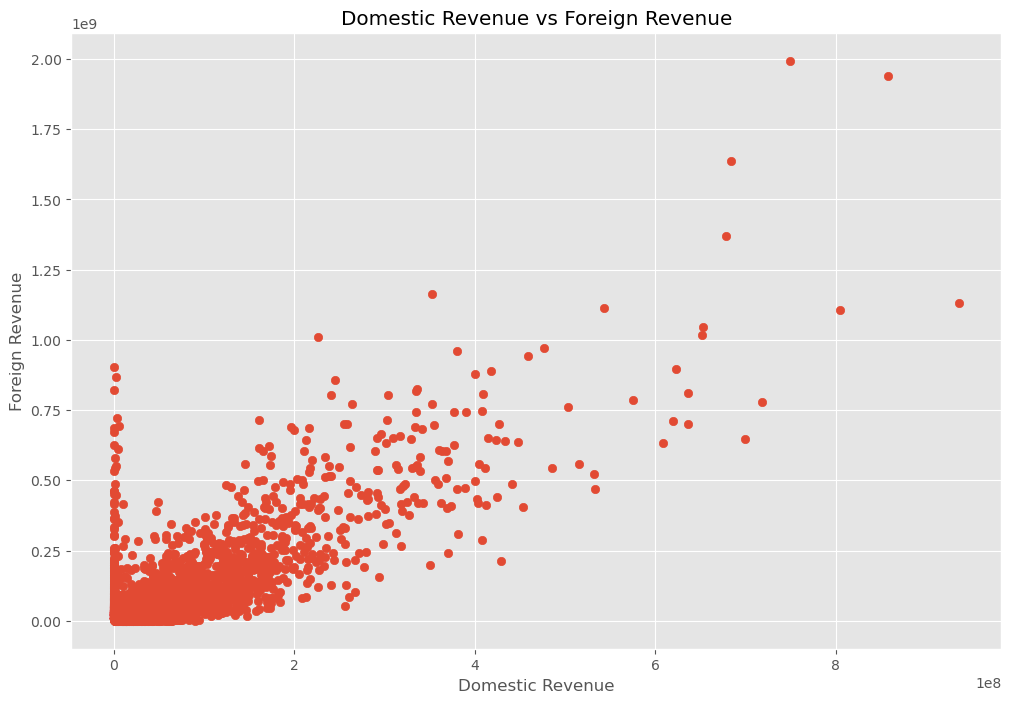

In [53]:
plt.scatter(x=df['Domestic Revenue'], y=df['Foreign Revenue'])
plt.title('Domestic Revenue vs Foreign Revenue')
plt.xlabel('Domestic Revenue')
plt.ylabel('Foreign Revenue')
plt.show()

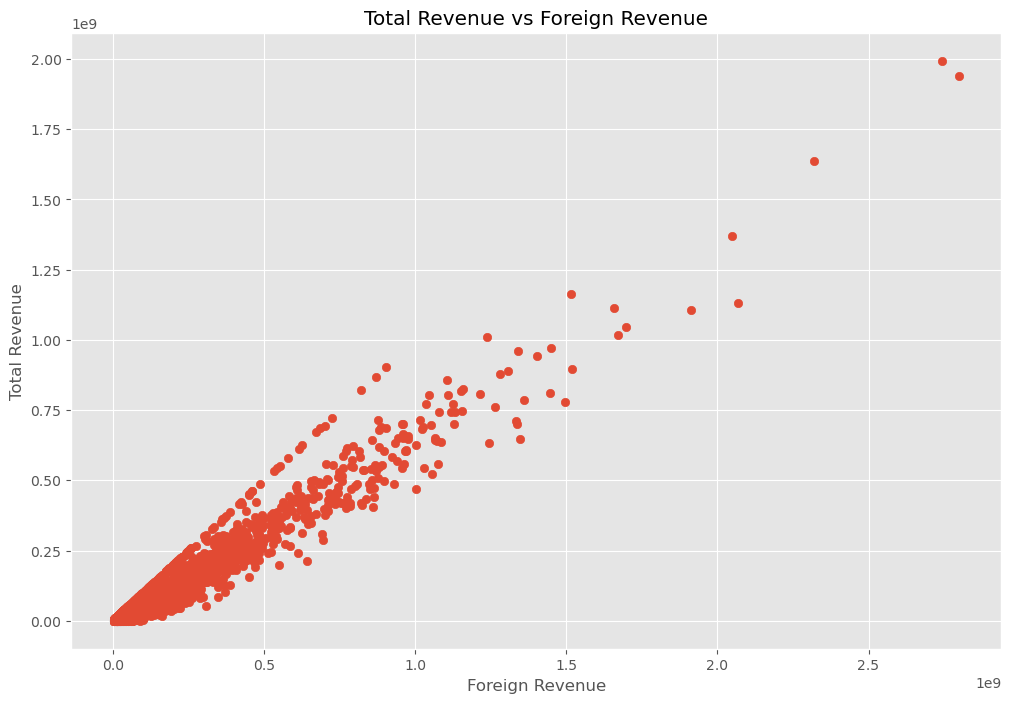

In [15]:
plt.scatter(df['Total Revenue'], df['Foreign Revenue'])
plt.ylabel('Total Revenue')
plt.xlabel('Foreign Revenue')
plt.title('Total Revenue vs Foreign Revenue')
plt.show()

<Axes: xlabel='Foreign Revenue', ylabel='Total Revenue'>

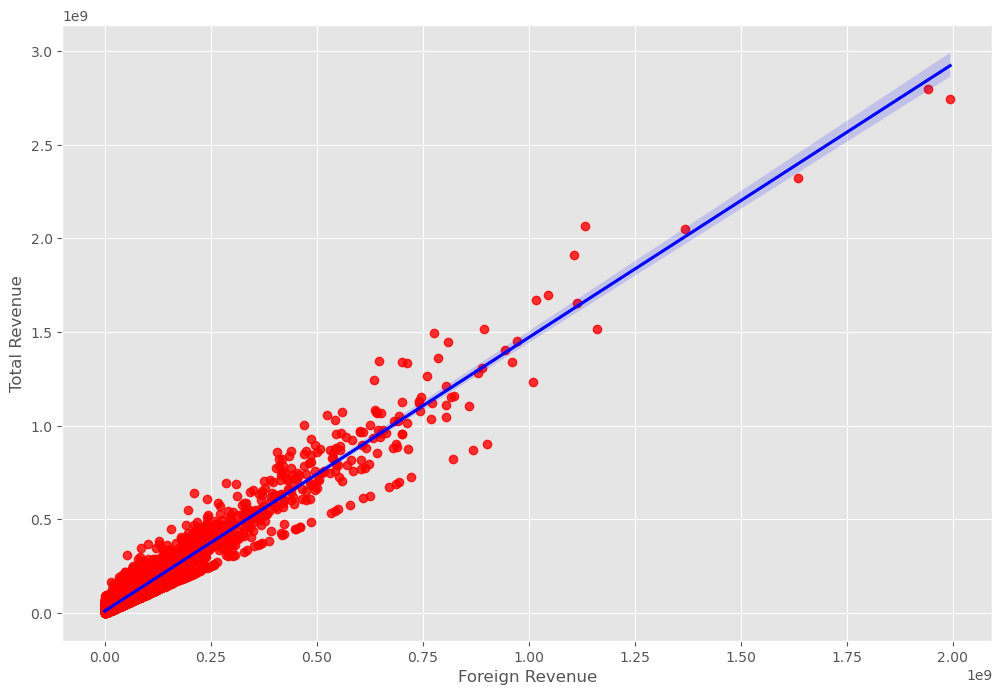

In [58]:
#Plot Total vs Foreign Revenue using seaborn
sns.regplot(x='Foreign Revenue',y='Total Revenue', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [60]:
# Calculate correlation matrix
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr(method='pearson')     #kendall,spearman
print(correlation_matrix)

                  Rank  Total Revenue  Domestic Revenue  Domestic %  \
Rank                 1             -1                -1          -0   
Total Revenue       -1              1                 1           0   
Domestic Revenue    -1              1                 1           0   
Domestic %          -0              0                 0           1   
Foreign Revenue     -1              1                 1          -0   
Foreign %            0             -0                -0          -1   
Year                 0              0                -0          -0   
Vote_Count          -1              1                 1           0   

                  Foreign Revenue  Foreign %  Year  Vote_Count  
Rank                           -1          0     0          -1  
Total Revenue                   1         -0     0           1  
Domestic Revenue                1         -0    -0           1  
Domestic %                     -0         -1    -0           0  
Foreign Revenue                 1  

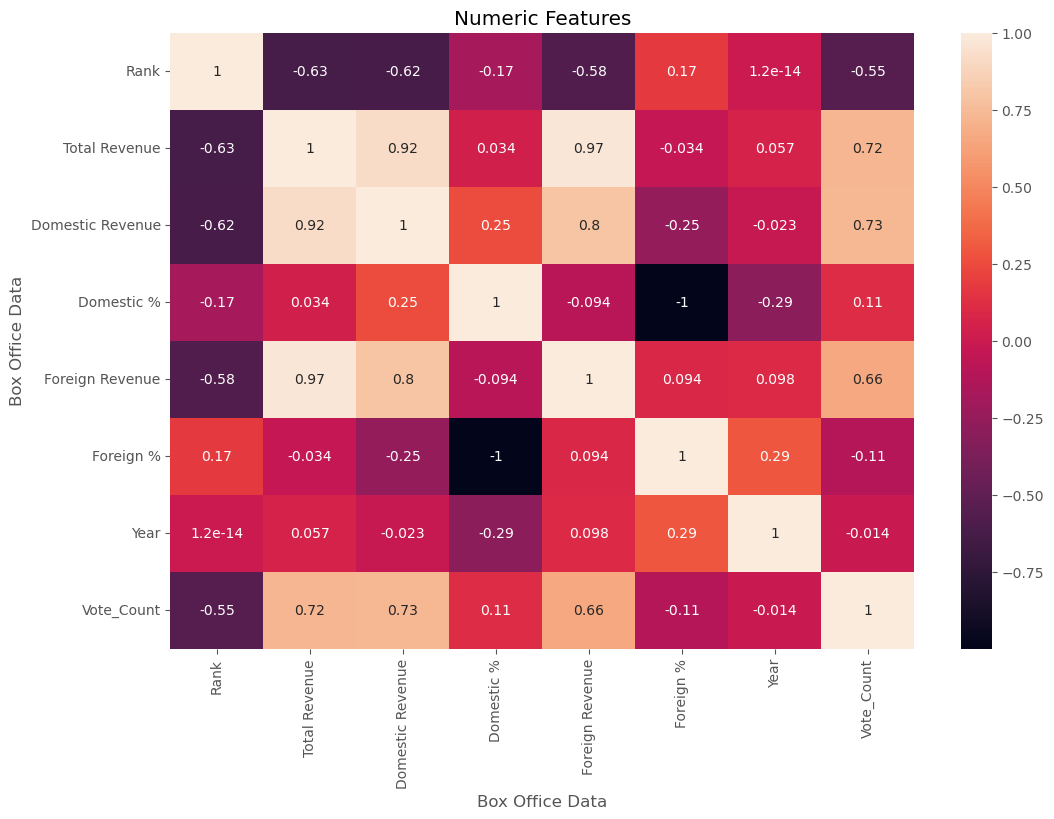

In [66]:
correlation_matrix = df_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.ylabel('Box Office Data')
plt.xlabel('Box Office Data')
plt.title('Numeric Features')
plt.show()